# Supervised LSTM Performance Analysis

## Notebook Overview 
This notebook is dedicated to the evaluation of a supervised LSTM model, trained according to the _evaluate_autoencoders_ notebook available in the project.

### Imports
This section imports essential libraries used throughout the notebook and adds the 'src' directory to the system path to allow importing modules from the source folder. 

In [1]:
import pandas as pd
import numpy as np
import sys
import os
# Getting src path to import modules
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))

# Adding src path to the system path, if not already added
if src_path not in sys.path:
    sys.path.append(src_path)

from dl_models import LSTMBasic as lstmb
from dl_models import LSTMKfold as lstmk
from utils import plots as plt

## Introductory test
Following the baseline Autoencoder test on Building 1, we now switch to a supervised LSTM approach to better leverage the sequential nature of the data for next-step forecasting. Unlike the autoencoder, this model is explicitly trained to predict the future time step given a fixed-length input sequence.

In [2]:
# Time series data for a specific building (Building_1.csv/Building_2.csv/Building_3.csv).
electricity_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_1.csv")

# Carbon intensity data.
carbon_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/carbon_intensity.csv")

# Pricing data.
pricing_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/pricing.csv")

# Weather data.
weather_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/weather.csv")

# Concatenate multiple datasets along the columns to create a single dataset.
df = pd.concat([electricity_data, carbon_data, pricing_data, weather_data], axis=1)

In [3]:
# Target features to forecast
targets = ['cooling_demand', 'carbon_intensity', 'solar_generation']

# List of features used for training the autoencoder.
features = ['month', 'hour', 'day_type', 'daylight_savings_status', 'indoor_dry_bulb_temperature', 'average_unmet_cooling_setpoint_difference', 
            'indoor_relative_humidity', 'non_shiftable_load', 'dhw_demand', 'cooling_demand', 'heating_demand', 'solar_generation', 'occupant_count', 
            'indoor_dry_bulb_temperature_set_point', 'hvac_mode', 'carbon_intensity', 'electricity_pricing', 
            'electricity_pricing_predicted_6h', 'electricity_pricing_predicted_12h', 'electricity_pricing_predicted_24h', 
            'outdoor_dry_bulb_temperature', 'outdoor_relative_humidity', 'diffuse_solar_irradiance', 'direct_solar_irradiance', 
            'outdoor_dry_bulb_temperature_predicted_6h', 'outdoor_dry_bulb_temperature_predicted_12h', 'outdoor_dry_bulb_temperature_predicted_24h', 
            'outdoor_relative_humidity_predicted_6h', 'outdoor_relative_humidity_predicted_12h', 'outdoor_relative_humidity_predicted_24h', 
            'diffuse_solar_irradiance_predicted_6h', 'diffuse_solar_irradiance_predicted_12h', 'diffuse_solar_irradiance_predicted_24h', 
            'direct_solar_irradiance_predicted_6h', 'direct_solar_irradiance_predicted_12h', 'direct_solar_irradiance_predicted_24h']

In [4]:
_, real_1, pred_1, model = lstmb.lstm_forecast(dataframe=df, features=features, timesteps=24, epochs=500, batch_size=32, hidden_units=128)

Epoch 1/500
18/18 - 6s - loss: 0.0710 - 6s/epoch - 351ms/step
Epoch 2/500
18/18 - 0s - loss: 0.0243 - 134ms/epoch - 7ms/step
Epoch 3/500
18/18 - 0s - loss: 0.0196 - 100ms/epoch - 6ms/step
Epoch 4/500
18/18 - 0s - loss: 0.0169 - 100ms/epoch - 6ms/step
Epoch 5/500
18/18 - 0s - loss: 0.0157 - 98ms/epoch - 5ms/step
Epoch 6/500
18/18 - 0s - loss: 0.0145 - 118ms/epoch - 7ms/step
Epoch 7/500
18/18 - 0s - loss: 0.0135 - 117ms/epoch - 7ms/step
Epoch 8/500
18/18 - 0s - loss: 0.0132 - 133ms/epoch - 7ms/step
Epoch 9/500
18/18 - 0s - loss: 0.0124 - 143ms/epoch - 8ms/step
Epoch 10/500
18/18 - 0s - loss: 0.0119 - 141ms/epoch - 8ms/step
Epoch 11/500
18/18 - 0s - loss: 0.0114 - 120ms/epoch - 7ms/step
Epoch 12/500
18/18 - 0s - loss: 0.0115 - 107ms/epoch - 6ms/step
Epoch 13/500
18/18 - 0s - loss: 0.0106 - 101ms/epoch - 6ms/step
Epoch 14/500
18/18 - 0s - loss: 0.0102 - 104ms/epoch - 6ms/step
Epoch 15/500
18/18 - 0s - loss: 0.0098 - 103ms/epoch - 6ms/step
Epoch 16/500
18/18 - 0s - loss: 0.0095 - 95ms/epoch

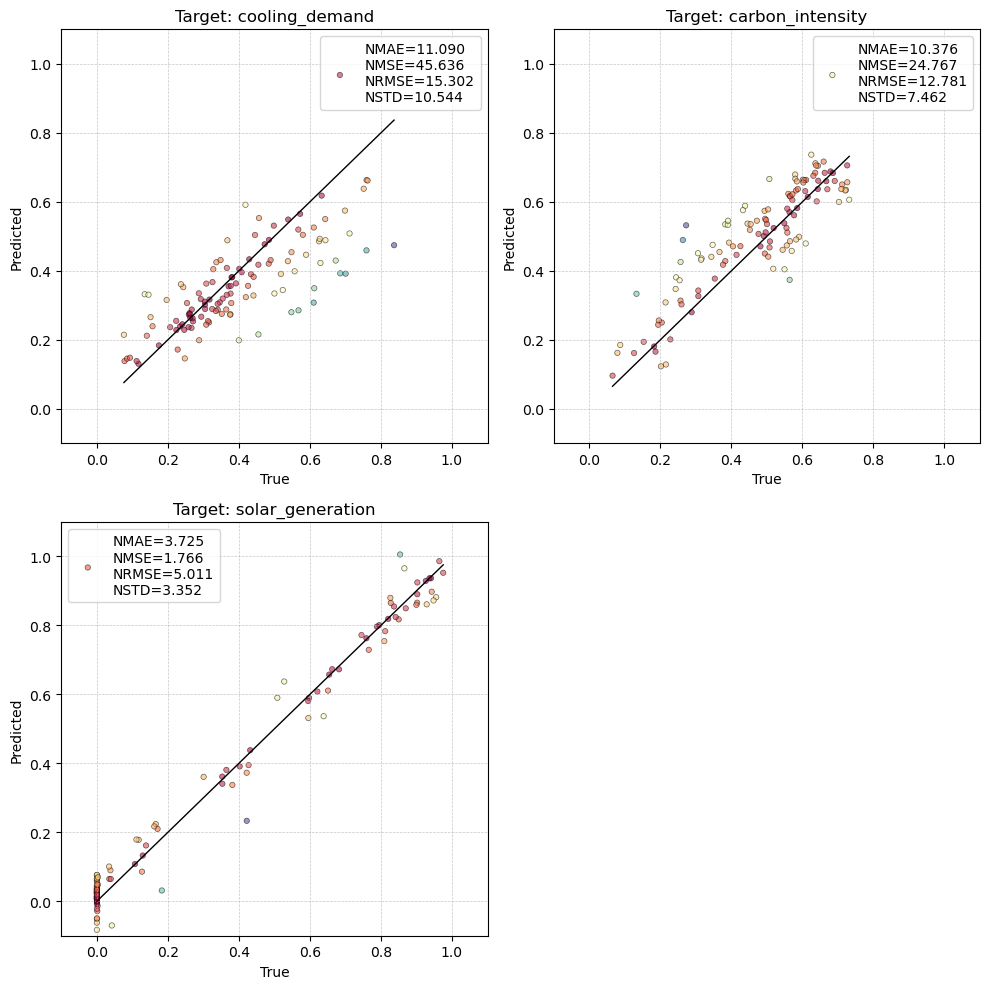

In [5]:
plt.plot_targets(real_1, pred_1, targets, features, percent=True)

## Cross-Building Test
The targets and the model remain unchanged. For this phase, we will use 100% of the data from Building 1 for training, while the remaining two buildings, being triplets with the first, will be used to evaluate the model's performance.

In [6]:
## Time series data for all buildings
building_1_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_1.csv")
building_2_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_2.csv")
building_3_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_3.csv")

# Concatenate train and test data
train_df = pd.concat([building_1_data, carbon_data, pricing_data, weather_data], axis=1)

# Concatenate the data from Building 2 and Building 3 vertically, creating a unified dataset for evaluation
building_2_3_data = pd.concat([building_2_data, building_3_data], axis=0, ignore_index=True)

# Combine carbon intensity, pricing, and weather data horizontally to align with building data
external_data = pd.concat([carbon_data, pricing_data, weather_data], axis=1)

# Repeat the external data (carbon, pricing, weather) to match the number of rows in Building 2 and 3 data
external_data_repeated = pd.concat([external_data] * 2, axis=0, ignore_index=True)

# Combine the building data and the repeated external data horizontally, preparing the final test dataset
test_df = pd.concat([building_2_3_data, external_data_repeated], axis=1)

In [7]:
_, real_2, pred_2, model = lstmb.lstm_forecast(train_df=train_df, test_df=test_df, features=features, timesteps=12, epochs=200, batch_size=32, hidden_units=128)
model.save(os.path.join("..", "reports", "models", "LSTM_generalization.h5"))

Epoch 1/200
23/23 - 1s - loss: 0.0459 - 1s/epoch - 52ms/step
Epoch 2/200
23/23 - 0s - loss: 0.0204 - 112ms/epoch - 5ms/step
Epoch 3/200
23/23 - 0s - loss: 0.0167 - 111ms/epoch - 5ms/step
Epoch 4/200
23/23 - 0s - loss: 0.0152 - 106ms/epoch - 5ms/step
Epoch 5/200
23/23 - 0s - loss: 0.0137 - 103ms/epoch - 4ms/step
Epoch 6/200
23/23 - 0s - loss: 0.0134 - 105ms/epoch - 5ms/step
Epoch 7/200
23/23 - 0s - loss: 0.0120 - 101ms/epoch - 4ms/step
Epoch 8/200
23/23 - 0s - loss: 0.0113 - 93ms/epoch - 4ms/step
Epoch 9/200
23/23 - 0s - loss: 0.0110 - 95ms/epoch - 4ms/step
Epoch 10/200
23/23 - 0s - loss: 0.0106 - 92ms/epoch - 4ms/step
Epoch 11/200
23/23 - 0s - loss: 0.0095 - 92ms/epoch - 4ms/step
Epoch 12/200
23/23 - 0s - loss: 0.0096 - 93ms/epoch - 4ms/step
Epoch 13/200
23/23 - 0s - loss: 0.0094 - 89ms/epoch - 4ms/step
Epoch 14/200
23/23 - 0s - loss: 0.0090 - 92ms/epoch - 4ms/step
Epoch 15/200
23/23 - 0s - loss: 0.0087 - 92ms/epoch - 4ms/step
Epoch 16/200
23/23 - 0s - loss: 0.0083 - 92ms/epoch - 4ms/s

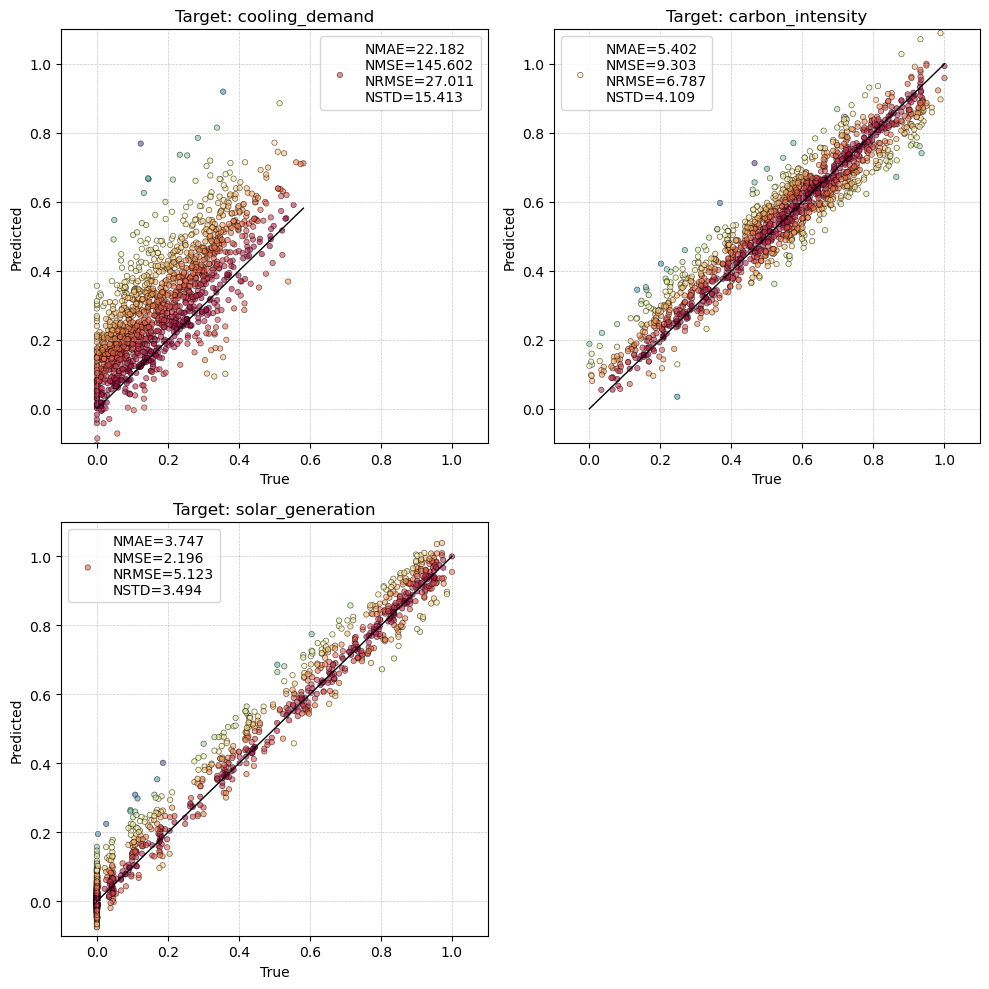

In [8]:
plt.plot_targets(real_2, pred_2, targets, features, percent=True)

## With K-fold Cross Validation
To ensure a more robust and unbiased evaluation of the supervised LSTM performance, a K-Fold Cross-Validation approach is adopted.

### Tuning

In [9]:
electricity_d = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_2.csv")
df2 = pd.concat([electricity_d, carbon_data, pricing_data, weather_data], axis=1)

In [10]:
real_3, pred_3, model = lstmk.lstm_forecast(dataframe = df2, features = features, epochs = 50, batch_size = 16, hidden_units = 16, timesteps = 3, kfold = 3)
model.save(os.path.join("..", "reports", "models", "LSTM_kfoldtuning.h5"))


Fold 1/3
Epoch 1/50
30/30 - 1s - loss: 0.0771 - 1s/epoch - 44ms/step
Epoch 2/50
30/30 - 0s - loss: 0.0325 - 93ms/epoch - 3ms/step
Epoch 3/50
30/30 - 0s - loss: 0.0271 - 94ms/epoch - 3ms/step
Epoch 4/50
30/30 - 0s - loss: 0.0243 - 93ms/epoch - 3ms/step
Epoch 5/50
30/30 - 0s - loss: 0.0228 - 96ms/epoch - 3ms/step
Epoch 6/50
30/30 - 0s - loss: 0.0214 - 94ms/epoch - 3ms/step
Epoch 7/50
30/30 - 0s - loss: 0.0204 - 94ms/epoch - 3ms/step
Epoch 8/50
30/30 - 0s - loss: 0.0200 - 94ms/epoch - 3ms/step
Epoch 9/50
30/30 - 0s - loss: 0.0195 - 96ms/epoch - 3ms/step
Epoch 10/50
30/30 - 0s - loss: 0.0190 - 93ms/epoch - 3ms/step
Epoch 11/50
30/30 - 0s - loss: 0.0190 - 93ms/epoch - 3ms/step
Epoch 12/50
30/30 - 0s - loss: 0.0184 - 99ms/epoch - 3ms/step
Epoch 13/50
30/30 - 0s - loss: 0.0179 - 92ms/epoch - 3ms/step
Epoch 14/50
30/30 - 0s - loss: 0.0178 - 93ms/epoch - 3ms/step
Epoch 15/50
30/30 - 0s - loss: 0.0178 - 92ms/epoch - 3ms/step
Epoch 16/50
30/30 - 0s - loss: 0.0171 - 93ms/epoch - 3ms/step
Epoch 17

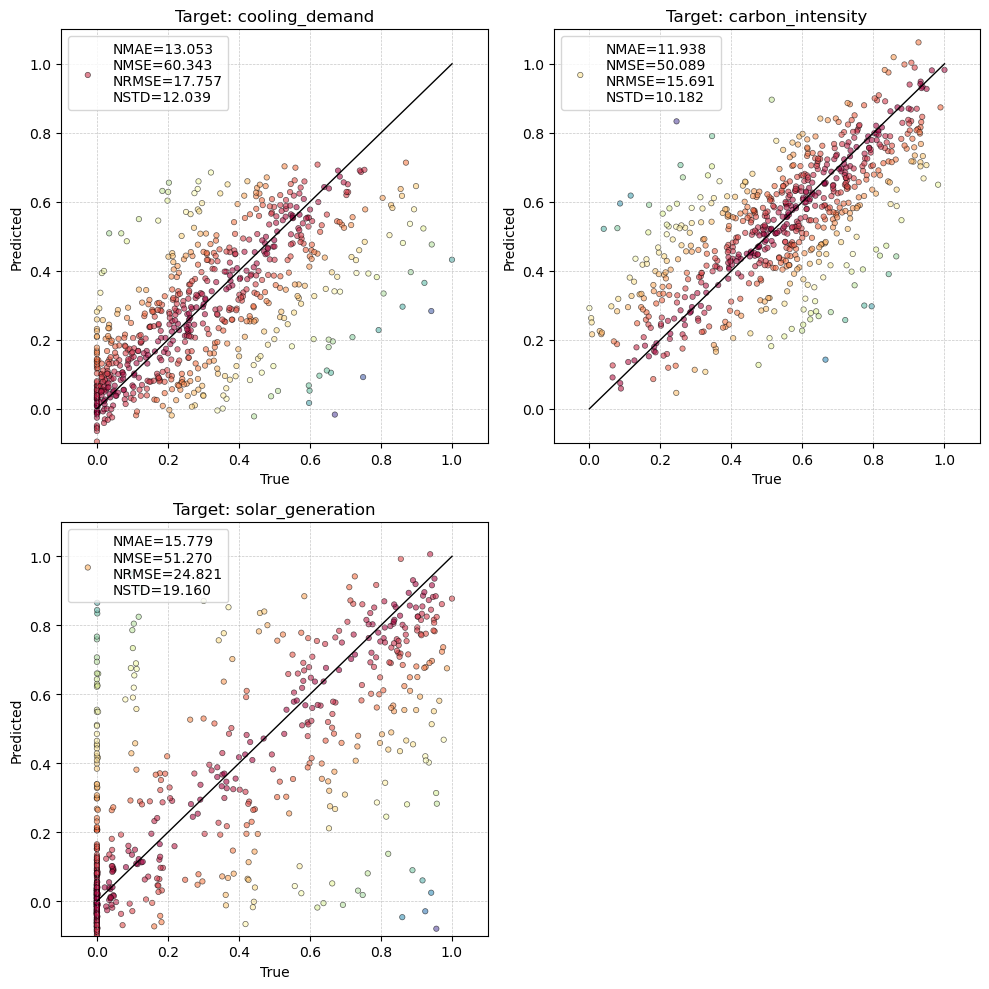

In [11]:
plt.plot_targets(real_3, pred_3, targets, features, percent=True)

### Final Training

In [12]:
electricity_d = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_3.csv")
df3 = pd.concat([electricity_d, carbon_data, pricing_data, weather_data], axis=1)

In [13]:
real_4, pred_4, model = lstmk.lstm_forecast(dataframe=df3, features=features, epochs = 150, hidden_units = 16, batch_size = 16, timesteps = 3)
model.save(os.path.join("..", "reports", "models", "LSTM_kfoldtrain.h5"))

Epoch 1/150
36/36 - 1s - loss: 0.0704 - 1s/epoch - 39ms/step
Epoch 2/150
36/36 - 0s - loss: 0.0280 - 117ms/epoch - 3ms/step
Epoch 3/150
36/36 - 0s - loss: 0.0233 - 114ms/epoch - 3ms/step
Epoch 4/150
36/36 - 0s - loss: 0.0203 - 116ms/epoch - 3ms/step
Epoch 5/150
36/36 - 0s - loss: 0.0187 - 111ms/epoch - 3ms/step
Epoch 6/150
36/36 - 0s - loss: 0.0173 - 113ms/epoch - 3ms/step
Epoch 7/150
36/36 - 0s - loss: 0.0160 - 111ms/epoch - 3ms/step
Epoch 8/150
36/36 - 0s - loss: 0.0155 - 113ms/epoch - 3ms/step
Epoch 9/150
36/36 - 0s - loss: 0.0147 - 114ms/epoch - 3ms/step
Epoch 10/150
36/36 - 0s - loss: 0.0142 - 111ms/epoch - 3ms/step
Epoch 11/150
36/36 - 0s - loss: 0.0134 - 111ms/epoch - 3ms/step
Epoch 12/150
36/36 - 0s - loss: 0.0133 - 113ms/epoch - 3ms/step
Epoch 13/150
36/36 - 0s - loss: 0.0127 - 112ms/epoch - 3ms/step
Epoch 14/150
36/36 - 0s - loss: 0.0125 - 110ms/epoch - 3ms/step
Epoch 15/150
36/36 - 0s - loss: 0.0122 - 118ms/epoch - 3ms/step
Epoch 16/150
36/36 - 0s - loss: 0.0122 - 114ms/epoc

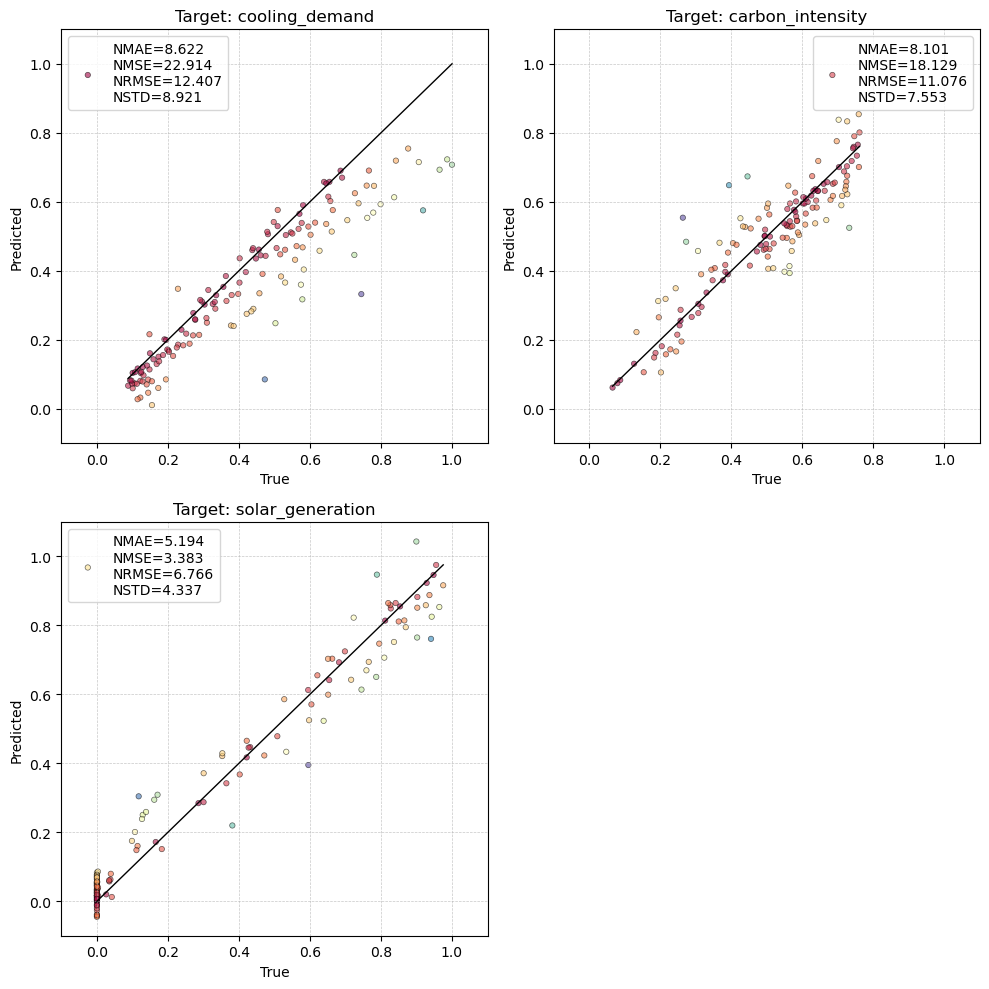

In [14]:
plt.plot_targets(real_4, pred_4, targets, features, percent=True)